# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **55**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Abhinav Sharma

EID: ass2575

Name:

EID:

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a) Given the data is getting generated from a given function we have for $x = x_0$ true value is $f(x_0) + \epsilon$. The $\epsilon$ term on average dissolves into zero due to the random gaussian assumption. The term $g(x_0)$ is essentially the predicted value from the defined estimator. The $E(g(x_0))$ becomes the expected value for the estimate at $x_0$.<br>Thus the mathematical representation $E[g(x_0)]-f(x_0)$ essentially signifies how different the average prediction of the estimator is from the true value. This is equivalent to the bias of the ML model.
<br>
<br>



b) Mathematically, we see the expected squared difference between the target and regression function can be expressed as the sum of two terms. The first term, called the squared bias, represents the extent to which the average prediction on all datapoints differs from the regression function value. The second term, referred to as the variance, represents the extent to which the prediction on individual datapoint differs from their average and hence measures the extent to which the estimator is sensitive to the choice of datapoint.

<br> For instance, a low bias high variance model could have average of predictions close to the true value of y, but individual predictions farther away from the true value. Similarly, a high bias low variance model could have all predictions close to each other but overall average of predictions farther away from the true value.

<br> The bias-variance trade-off simply states as we try to avail the best test set accuracy by consistently increasing the model complexity, we initially suffer from high bias as a simpler model would predict a non-personalized prediction for each datapoint. If we increase the complexity by quite a lot, we suffer from high variance, meaning the model becomes too personalized for the training set but would incur high error on the test set. The ideal complexity is where we have the sum of the bias and variance terms as low as possible.


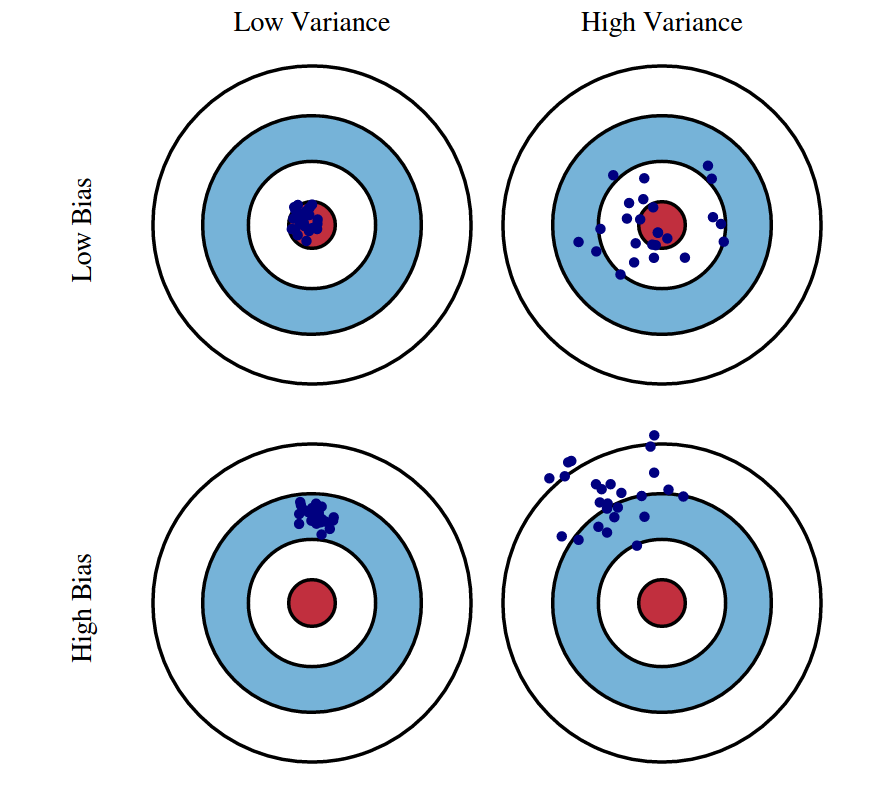

In [2]:
import requests
import IPython.display as Disp
url = 'https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png'
Disp.Image(requests.get(url).content)

# Question 2: Bias-Variance exploration (15 pts)

We want to build a model that can predict y for unknown inputs x. Please use **tmp.data.npy** data for this question.

a) (**10 pts**) Fit polynomial models of degrees 2, 4, 8 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

**You can use following codes to load the dataset**:


In [ ]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('./tmp.data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

## Answer:

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a)We're trying to find the local/global minima of the cost function in the weight space to get an estimator that promises lesser/minimum error. Essentially, there are three variants for performing the gradient descent.  <br>
- Batch Gradient Descent : Use the entire dataset and compute gradient to update the weights
- Stochastic Gradient Descent : Update weights using one random datapoint at a time
- Mini-batch Gradient Descent: Middle ground of the above two approaches. Create mini-batches of say 100 datapoints, compute mean gradient and update weights per mini-batch.

Stochastic gradient descent is preferred in applications such as non-convex, multiple local minima scenarios since the noise addition when considering each datapoint can help model get out of local minimas. Additionally, SGD is preferable in cases of sequential (streaming data) and non-stationary (underlying assumptions change with time) data given addition of one datapoint at a time to update the weights takes into account the changing underlying patterns in the data. SGD is computationally faster as well compared to batch gradient descent.  However using SGD, the path to the optimum (assuming it would always be the same optimum) can be much noisier. To reduce this noise, often minibatch gradient descent is preferred to average out the noise within small batches and update weights one minibatch at a time.
<br>
<br>

b)
One main issue in fixed learning rate methods is that it can't get closer to the true minima than the step size so it doesn't converge. It also spends too many iterations moving towards the minima when it's feasible to do it faster with a step size that is larger.
The Nelson Mead method considers acceleration and deceleration parameters on the learning rate. Meaning if the slope of the curve does not change sign in each iteration, the learning rate is multiplied by the acceleration parameter (greater than one) whereas whenever a sign change is observed for the slope we multiply the learning rate by a deceleration parameter (less than 1)

This enables our optimization to move towards the convergence point faster than the fixed step size method.
For higher dimensional (n) searches the method works by considering a shape with n+1 points and the shape expanding or contracting as per the setting of the parameters.

Couple major problems of Nelson Mead method could be :
- High dimentionality : As dimensionality increases, such as in case of ML models with many paramters, direct search methods like Nelson-Mead do not offer best results. 
- It also becomes diffecult to evaluate the direction to move into given it increases exponentially with respect to the number of dimensions.
- Unlike modern optimizers, Nelson-Mead method may get converged to a non-stationary point.


# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        
    def sgd(self, gradient):
        self.coef # = please put your codes here to update the self.coef using SGD
    
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                   #please put your codes here

                # Compute gradients
                    #please put your codes here
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return None #this line is just a placeholder, please delete this line in your code        

In [ ]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer: